<a href="https://colab.research.google.com/github/riz1raj/CVPR/blob/master/finalASSN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Predefined Method 1**

In [71]:

#convolution layer method
def ConvLayer(arr,a, size=32):
    np_arr= np.zeros((size,size), dtype=int)
    for i in range(size):
        for j in range(size):
            b = arr[i:i+3, j:j+3]
            np_arr[i][j] = np.sum(a*b)
    return np_arr

    

**Predefined Method 2**

In [72]:
#Relu method
def active_func(feature_map):
    relu_output = np.zeros((feature_map.shape),dtype=int)
    for r in np.arange(0,feature_map.shape[0]):
        for c in np.arange(0, feature_map.shape[1]):
            relu_output[r, c] = np.max([feature_map[r, c], 0])
    return relu_output

**Predefined Method 3**

In [73]:
#stack_method
def stack_function(*args):
    arr = 0
    for elem in args :
        arr += elem
    return arr

**Predefined Method 4**

In [74]:
# max pooling
def maxpool(image, f=2, s=2):
    h_previous, w_previous = image.shape
    
    # calculate output dimensions after the maxpooling operation.
    h = int((h_previous - f)/s)+1 
    w = int((w_previous - f)/s)+1
    
    # create a matrix to hold the values of the maxpooling operation.
    dwn_smpld = np.zeros((h, w)) 
    current_y = output_y = 0
    # slide the max pooling window vertically across the image
    while current_y + f <= h_previous:
        current_x = output_x = 0
        # slide the max pooling window horizontally across the image
        while current_x + f <= w_previous:
            # choose the maximum value within the window at each step and store it to the output matrix
            dwn_smpld[output_y, output_x] = np.max(image[current_y:current_y+f, current_x:current_x+f])
            current_x += s
            output_x += 1
        current_y += s
        output_y += 1
    return dwn_smpld

**Import the main image**

(32, 32)


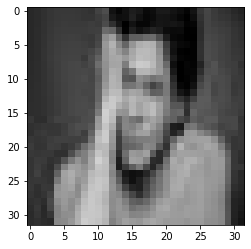

In [75]:
img= cv2.imread('0000.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
print(image.shape)
b=np.pad(image,((1,1),(1,1)), 'constant')
plt.imshow(img)

**First loop 1st Filters**

In [76]:
#filter -1 
a1 = np.array([
              [1, 0, 1],
              [0, 1, 0],
              [1, 0, 1]
            ])
a11 = ConvLayer(b,a1)
#filter - 2 
a2 = np.array([
              [1,   1,  1],
              [0,   0,  0],
              [1,   1,  1]
            ])
a22 = ConvLayer(b,a2)
#filter -3 
a3 = np.array([
              [0, 0, 0],
              [1, 1, 1],
              [0 ,0, 0]
            ])
a33 = ConvLayer(b,a3)
#filter - 4 
a4 = np.array([
              [  0  , -.5 ,    0 ],
              [-.5 ,   1  , -.5 ],
              [  0  , -.5 ,    0 ]
            ])
a44 = ConvLayer(b,a4)
#filter - 5 
a5 = np.array([
                [1 / 9, 1 / 9, 1 / 9],
                [1 / 9, 1 / 9, 1 / 9],
                [1 / 9, 1 / 9, 1 / 9]
            ])
a55 = ConvLayer(b,a5)

<Figure size 432x288 with 0 Axes>

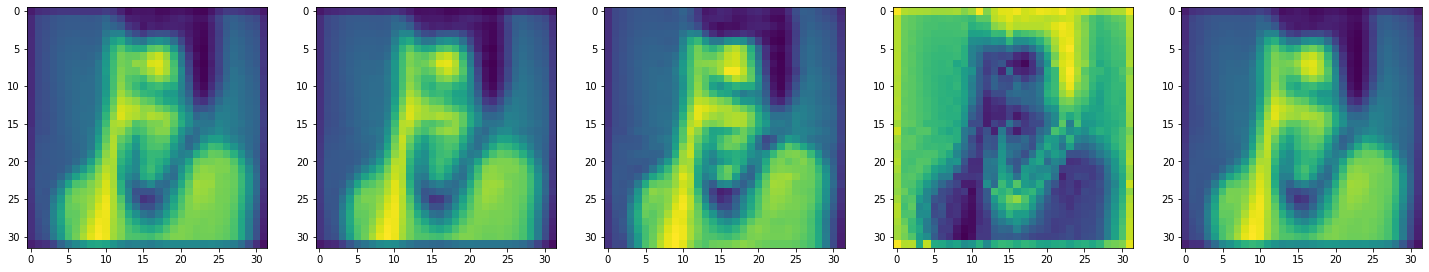

In [77]:
plt.figure()
f, axarr = plt.subplots(1,5,figsize=(25,25)) 
axarr[0].imshow(a11)
axarr[1].imshow(a22)
axarr[2].imshow(a33)
axarr[3].imshow(a44)
axarr[4].imshow(a55)

**Relu Activation Functions**

In [78]:
a111 = active_func(a11)
a222 = active_func(a22)
a333 = active_func(a33)
a444 = active_func(a44)
a555 = active_func(a55)

<Figure size 432x288 with 0 Axes>

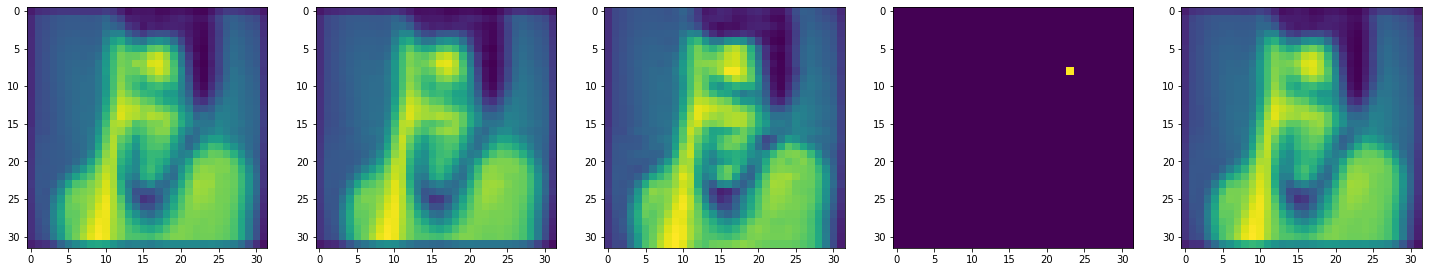

In [79]:
plt.figure()
f, axarr = plt.subplots(1,5,figsize=(25,25)) 
axarr[0].imshow(a111)
axarr[1].imshow(a222)
axarr[2].imshow(a333)
axarr[3].imshow(a444)
axarr[4].imshow(a555)

**First loop First Stack**

(34, 34)


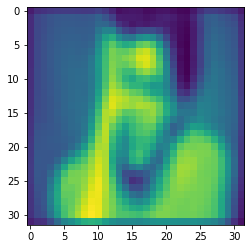

In [80]:
t = stack_function(a111,a222,a333,a444,a555)
plt.imshow(t)
t1=np.pad(t,((1,1),(1,1)), 'constant')
print(t1.shape)

**First loop 2nd Filters**

In [81]:
#filter -1 
c1 = np.array([
              [0, 1, 0],
              [0, 1, 0],
              [0 ,1, 1]
            ])
c11 = ConvLayer(t1,c1)
#filter - 2 
c2 = np.array([
              [1, 0, 1],
              [1, 0, 0],
              [1, 1, 0]
            ])
c22 = ConvLayer(t1,c2)
#filter -3 
c3 = np.array([
              [1, 0, 1],
              [0, 1, 0],
              [0 ,0, 0]
            ])
c33 = ConvLayer(t1,c3)
#filter - 4 
c4 = np.array([
              [1, 1, 1],
              [1, 0, 0],
              [0, 1, 0]
            ])
c44 = ConvLayer(t1,c4)
#filter - 5 
c5 = np.array([
              
              [1, 0, 0],
              [1, 0, 1],
              [1, 0, 1]
            ])
c55 = ConvLayer(t1,c5)

<Figure size 432x288 with 0 Axes>

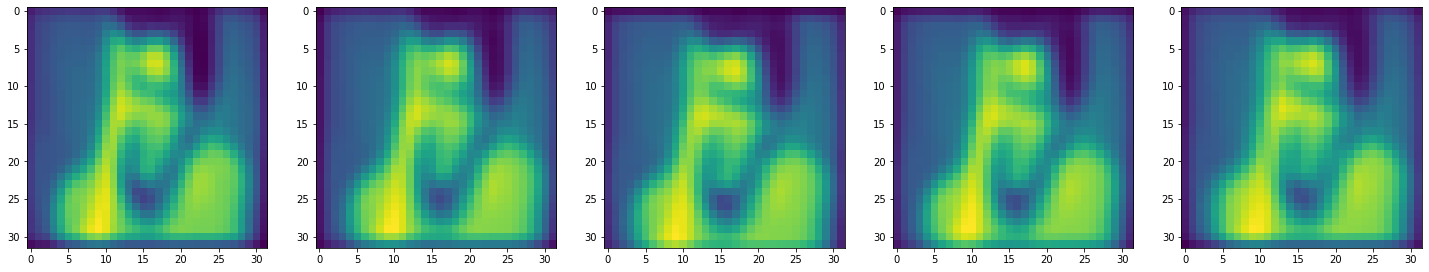

In [82]:
plt.figure()
f, axarr = plt.subplots(1,5,figsize=(25,25)) 
axarr[0].imshow(c11)
axarr[1].imshow(c22)
axarr[2].imshow(c33)
axarr[3].imshow(c44)
axarr[4].imshow(c55)

**Relu Activation Functions**

In [83]:
c111 = active_func(c11)
c222 = active_func(c22)
c333 = active_func(c33)
c444 = active_func(c44)
c555 = active_func(c55)

<Figure size 432x288 with 0 Axes>

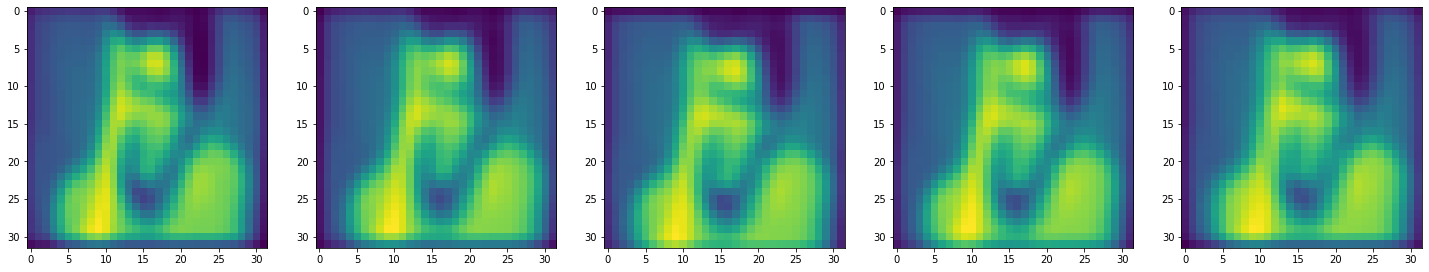

In [84]:
plt.figure()
f, axarr = plt.subplots(1,5,figsize=(25,25)) 
axarr[0].imshow(c111)
axarr[1].imshow(c222)
axarr[2].imshow(c333)
axarr[3].imshow(c444)
axarr[4].imshow(c555)

**First loop Second Stack**

(32, 32)


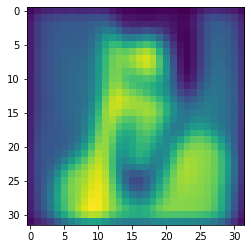

In [85]:
p = stack_function(c111,c222,c333,c444,c555)
plt.imshow(p)
print(p.shape)

**First Max Pooling**

(18, 18)


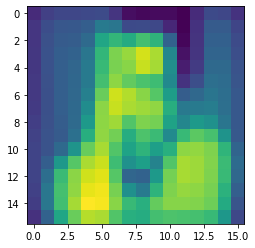

In [86]:
w = maxpool(p,2,2)
plt.imshow(w)
w1=np.pad(w,((1,1),(1,1)), 'constant')
print(w1.shape)

**Second loop 1st Filters**

In [87]:
#filter -1 
e1 = np.array([
              [1, 0, 1],
              [0, 1, 0],
              [1 ,0, 1]
            ])
e11 = ConvLayer(w1,e1,16)
#filter - 2 
e2 = np.array([
              [1, 0, 1],
              [1, 0, 1],
              [1, 0, 1]
            ])
e22 = ConvLayer(w1,e2,16)
#filter -3 
e3 = np.array([
              [0, 1, 0],
              [1, 1, 1],
              [0 ,1, 0]
            ])
e33 = ConvLayer(w1,e3,16)
#filter - 4 
e4 = np.array([
              [1, 1, 1],
              [0, 0, 0],
              [0, 0, 0]
            ])
e44 = ConvLayer(w1,e4,16)
#filter - 5 
e5 = np.array([
              
              [0, 1, 0],
              [0, 1, 0],
              [1, 1, 1]
            ])
e55 = ConvLayer(w1,e5,16)

<Figure size 432x288 with 0 Axes>

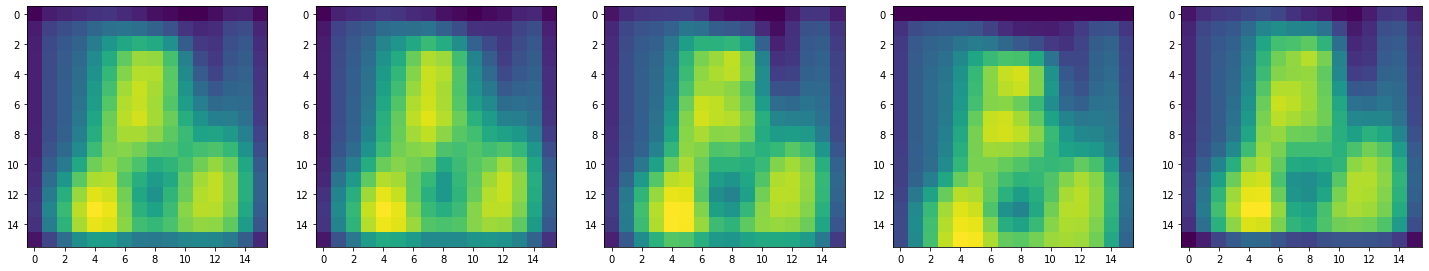

In [88]:
plt.figure()
f, axarr = plt.subplots(1,5,figsize=(25,25)) 
axarr[0].imshow(e11)
axarr[1].imshow(e22)
axarr[2].imshow(e33)
axarr[3].imshow(e44)
axarr[4].imshow(e55)

**Relu Activation Function**

In [89]:
e111 = active_func(e11)
e222 = active_func(e22)
e333 = active_func(e33)
e444 = active_func(e44)
e555 = active_func(e55)

<Figure size 432x288 with 0 Axes>

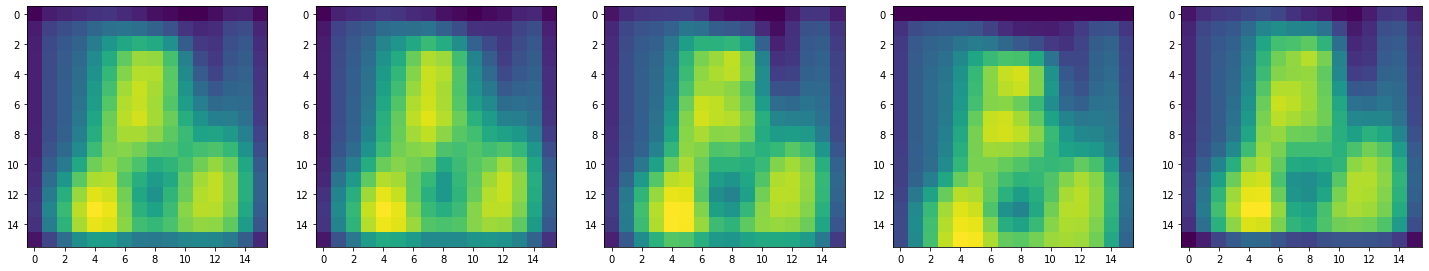

In [90]:
plt.figure()
f, axarr = plt.subplots(1,5,figsize=(25,25)) 
axarr[0].imshow(e111)
axarr[1].imshow(e222)
axarr[2].imshow(e333)
axarr[3].imshow(e444)
axarr[4].imshow(e555)

**Second  loop First Stack**

(16, 16)


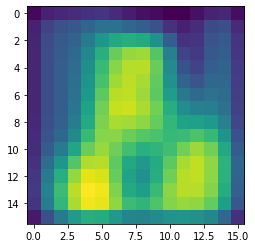

In [91]:
q = stack_function(e111,e222,e333,e444,e555)
plt.imshow(q)
print(q.shape)

**Second Max pooling**

(8, 8)


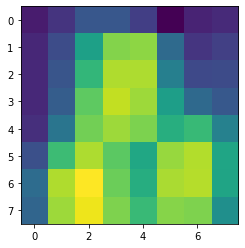

In [92]:
y = maxpool(q)
plt.imshow(y)
print(y.shape)